# Flatiron Project 1 - Seattle Housing Data

The following analysis is the collaborative work of Mate Pocs and Naweed Ahmed, created in 2019 January, for the Flatiron School Project. 

Our Jupyter Notebook is structured as follows:

- __Section 1, Data Cleaning__: In this section, we take the original database, kc_house_data.csv, and clean up the missing values, duplicates, erroneous data inputs, and outliers. Our analysis process is shown in details, so even if we do not adjust certain values, we show our thought process.
- __Section 2, Data Exploration__: We ask and answer exploratory questions regarding the data. At this point, we are using the data we have already cleaned up in Section 1. 
- __Section 3, Linear Regression__: In the last section, we fit a linear regression model and try to find the best model to describe the variance in the price of the houses. 

## Section 1 - Data Cleaning

In [73]:
# importing librarires to be used in sections 1-2
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
# importing data
data = pd.read_csv('kc_house_data.csv')

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


The data consists of 21,597 rows. 
There are missing values in at least three columns (waterfront, view, yr_renovated), this does not imply that the rest are correct. 
  
In the following, we are going through the columns one by one, and decide how to process. We are going in a different order, for example we are grouping the sqft variables, etc.


### 'id'

TODO!!

### 'date'

In [76]:
data['date'].value_counts().head()

6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64

In [77]:
data['date'].value_counts().tail()

11/30/2014    1
11/2/2014     1
5/17/2014     1
2/15/2015     1
5/15/2015     1
Name: date, dtype: int64

In [78]:
type(data['date'][0])

str

In [79]:
# the date fields are entered as strings, convert to datetime

data['date'] = pd.to_datetime(data['date'], format = '%m/%d/%Y')

In [80]:
print(data['date'].max(), data['date'].min())

2015-05-27 00:00:00 2014-05-02 00:00:00


Fields in column 'date' are proper date values, all from 2014 - 2015.

### 'lat', 'long', and 'zipcode'

In [81]:
data[['lat', 'long', 'zipcode']].describe()

,lat,long,zipcode
count,21597.000000,21597.000000,21597.000000
mean,47.560093,-122.213982,98077.951845
std,0.138552,0.140724,53.513072
min,47.155900,-122.519000,98001.000000
25%,47.471100,-122.328000,98033.000000
50%,47.571800,-122.231000,98065.000000
75%,47.678000,-122.125000,98118.000000
max,47.777600,-121.315000,98199.000000


'lat', 'long', and 'zipcode' variables do not look incorrect as far as we can tell. They are all close to Seattle as indicated in the data summary. Zipcodes starting with 980 are in Seattle Vicinity, the ones starting with 981 are in Seattle Main. 

It is doubtful we can use them in a linear regression model in their current form, but they do not show obvious incorrectness. 

### 'waterfront'

In [82]:
data['waterfront'].value_counts(dropna = False)

 0.0    19075
NaN      2376
 1.0      146
Name: waterfront, dtype: int64

In [83]:
(data[data['waterfront'] == 1]['price']/1000).describe()

count     146.000000
mean     1717.214726
std      1145.384857
min       285.000000
25%       827.500000
50%      1510.000000
75%      2282.500000
max      7060.000000
Name: price, dtype: float64

In [84]:
(data['price']/1000).describe()

count    21597.000000
mean       540.296574
std        367.368140
min         78.000000
25%        322.000000
50%        450.000000
75%        645.000000
max       7700.000000
Name: price, dtype: float64

The distributions of the waterfront vs non-waterfront houses' prices are somewhat different, but the ratio of waterfront houses in the data is so low that we do not think it can be reliably used in a regression model. 

Possible treatment would be to keep the column and either

- delete the rows where we have missing values;
- populate missing values with 0;
- estimate waterfront value based on available lattitude and longitude data.

Ultimately, for our linear regression analysis, we can't use the column. 

In [85]:
data.drop(labels = 'waterfront', axis = 1, inplace = True);

### 'view'

In [86]:
data['view'].value_counts(dropna = False)

 0.0    19422
 2.0      957
 3.0      508
 1.0      330
 4.0      317
NaN        63
Name: view, dtype: int64

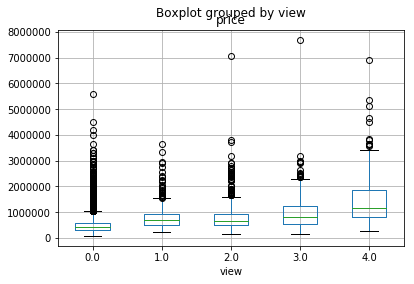

In [87]:
data.boxplot(column = 'price', by = 'view')

In [88]:
data.groupby(['view'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
view,,,,,,,,
0.0,19422.0,4.968061e+05,287419.959567,78000.0,311525.0,432500.0,600000.0,5570000.0
1.0,330.0,8.133733e+05,512776.626107,217000.0,498250.0,691944.0,923750.0,3650000.0
2.0,957.0,7.913904e+05,510385.693444,169317.0,485000.0,675000.0,938000.0,7060000.0
3.0,508.0,9.732852e+05,613898.399842,154000.0,558000.0,802500.0,1260000.0,7700000.0
4.0,317.0,1.452466e+06,930747.701932,252000.0,815000.0,1180000.0,1850000.0,6890000.0


In [89]:
data[data['view'].isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
114,8961960160,2014-10-28,480000.0,4,2.50,3230,16171,2.0,NaN,3,9,2520,710.0,2001,0.0,98001,47.3183,-122.253,2640,8517
129,7853210060,2015-04-06,430000.0,4,2.50,2070,4310,2.0,NaN,3,7,2070,0.0,2004,0.0,98065,47.5319,-121.850,1970,3748
205,3456000310,2014-08-04,840000.0,4,1.75,2480,11010,1.0,NaN,4,9,1630,850.0,1966,NaN,98040,47.5378,-122.219,2770,10744
487,1895000260,2014-07-21,207950.0,2,2.00,890,5000,1.0,NaN,3,6,890,0.0,1917,0.0,98118,47.5158,-122.264,1860,5000
590,2525069041,2014-09-04,505000.0,3,1.50,1830,217800,1.0,NaN,3,7,1010,820.0,1981,0.0,98053,47.6277,-121.972,2450,165963
938,1324079046,2015-01-20,350000.0,3,2.25,1580,47916,1.0,NaN,3,7,1580,0.0,1979,0.0,98024,47.5583,-121.852,1980,75358
1313,7558700030,2015-04-13,5300000.0,6,6.00,7390,24829,2.0,NaN,4,12,5000,2390.0,1991,0.0,98040,47.5631,-122.210,4320,24619
1364,9468200140,2014-08-19,450000.0,2,1.75,1250,2890,1.0,NaN,4,7,790,460.0,1920,0.0,98103,47.6795,-122.353,1500,3225
1701,3121069036,2014-12-08,617000.0,3,1.75,3020,360241,2.0,NaN,3,8,3020,0.0,1992,0.0,98092,47.2662,-122.088,1890,209959


Based on quick preliminary statistics, it is possible that the 'view' variable will play a relevant role. 

We do not want to drop the entire column or the rows where the value is missing. 

Instead, we are populating the NaN values with the median of the column, which is 0. 

In [90]:
data['view'] = data['view'].fillna(data['view'].median());
data['view'].value_counts(dropna=False)

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

### 'condition', 'grade'

In [92]:
data['condition'].value_counts(dropna = False)

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [93]:
data['grade'].value_counts(dropna = False)

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [99]:
# filtering to low conditions / grades

data[(data['condition'] < 2) | (data['grade'] < 5)]
# data[(data['condition'] < 2)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
36,9435300030,2014-05-28,550000.0,4,1.00,1660,34848,1.0,0.0,1,5,930,730.0,1933,0.0,98052,47.6621,-122.132,2160,11467
350,7325600160,2014-06-04,299000.0,1,0.75,560,12120,1.0,0.0,3,4,560,0.0,1967,0.0,98014,47.6750,-121.854,1300,19207
380,1726059053,2014-09-16,270000.0,2,1.50,1380,209959,1.0,0.0,1,6,1380,0.0,1954,0.0,98011,47.7461,-122.195,3130,19868
397,5175800060,2014-06-23,365000.0,4,2.00,1940,25600,1.0,0.0,1,8,1940,0.0,1962,0.0,98006,47.5722,-122.129,2000,10071
465,8658300340,2014-05-23,80000.0,1,0.75,430,5050,1.0,0.0,2,4,430,0.0,1912,0.0,98014,47.6499,-121.909,1200,7500
1065,3340401535,2014-11-05,140000.0,1,1.00,730,6890,1.0,0.0,4,4,730,0.0,1926,0.0,98055,47.4670,-122.215,1790,7969
1440,5694000710,2014-11-07,352950.0,3,1.00,1760,3000,1.5,0.0,1,6,1760,0.0,1900,0.0,98103,47.6598,-122.348,1320,1266
1732,913000340,2015-01-02,252000.0,1,1.00,680,1638,1.0,4.0,1,6,680,0.0,1910,1992.0,98116,47.5832,-122.399,1010,3621
2221,3886902445,2015-03-16,535000.0,2,1.00,920,9000,1.0,0.0,1,6,920,0.0,1954,0.0,98033,47.6831,-122.189,1760,8400
3002,9187200245,2014-12-31,441000.0,4,1.50,1100,3300,1.0,0.0,1,7,1100,0.0,1919,0.0,98122,47.6033,-122.295,2020,4000


Data Cleaning Summary: 
  
id: 
  
date: re-coded to datetime, no additional edits
  
lat: no edits
  
long: no edits
  
zipcode: no edits
  
waterfront: column deleted
  
view: NaN's populated with the median of the column